In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [3]:
df=pd.read_csv('zomato.csv')
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [7]:
df.drop(['address','phone','dish_liked'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [9]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(38315, 10)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], dtype=object)

In [17]:
import numpy as np

def handelrate(value):
    try:
        value = str(value).strip()

        # Remove unwanted entries
        if value == 'NEW' or value == '-' or '/' not in value:
            return np.nan

        # Extract the part before '/5' and convert to float
        value = value.split('/')[0]
        return float(value)

    except:
        return np.nan  # If conversion fails, return NaN

# Apply to original DataFrame
df['rate'] = df['rate'].apply(handelrate)

# Drop rows with missing or invalid ratings
df.dropna(subset=['rate'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Preview
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [19]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [21]:
df['rate'].isnull().sum()

0

In [27]:
df.dropna(inplace=True)
df.shape

(26254, 10)

In [29]:
df.rename(columns={'approx_cost(for two people)':'cost2plates' , 'listed_in(type)':'type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [31]:
df['cost2plates'].unique()

array(['800', '300', '600', '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '2,000', '1,400', '1,800',
       '1,900', '180', '330', '2,500', '3,000', '2,800', '3,400', '50',
       '40', '2,100', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100',
       '120', '5,000', '3,700', '2,700', '4,500', '80', '1,650'],
      dtype=object)

In [63]:
def handlecomma(value):
    value = str(value)  # Ensure the value is a string

    if ',' in value:
        value = value.replace(',', '')  # Remove comma
        return float(value)  # Convert to float
    else:
        return float(value)
df['cost2plates'] = df['cost2plates'].apply(handlecomma)

# Optional: check unique values
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  550.,  500.,  450.,  650.,  700.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 2000., 1400., 1800., 1900.,  180.,  330.,
       2500., 3000., 2800., 3400.,   50.,   40., 2100., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 2700., 4500.,   80., 1650.])

In [67]:
# df.drop(['rest_type','cuisines'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,600.0,Buffet


DATA VISUALIZATION

 Q 1 . WHAT TYPE OF RESTARUANT DO THE MAJORITY OF CUSTOMERS ORDER FROM ?

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Cafes'),
  Text(2, 0, 'Delivery'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Drinks & nightlife'),
  Text(6, 0, 'Pubs and bars')])

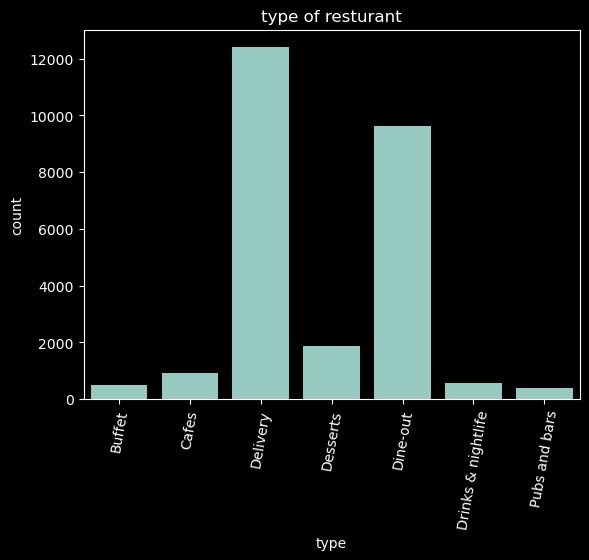

In [40]:
sns.countplot(x=df['type'])
plt.title('type of resturant')
plt.xticks(rotation=80, fontsize=10) 

 Q 2 . WHAT ARE THE RATING THAT THE MAJORITY OF RESTAURANT HAVE RECEIVED?

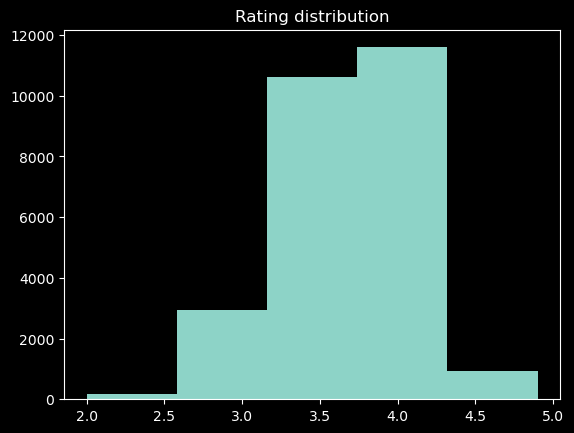

In [72]:
plt.hist(df['rate'],bins=5)
plt.title('Rating distribution')
plt.show()

 Q 3. ZOMATO HAS OBSERVED THAT MOST COUPLES ORDER MOST OF THERI FOOD ONLINE.WHAT IS THEIR AVERAGE SPENDING ON EACH OTHER?

<Axes: xlabel='cost2plates', ylabel='Count'>

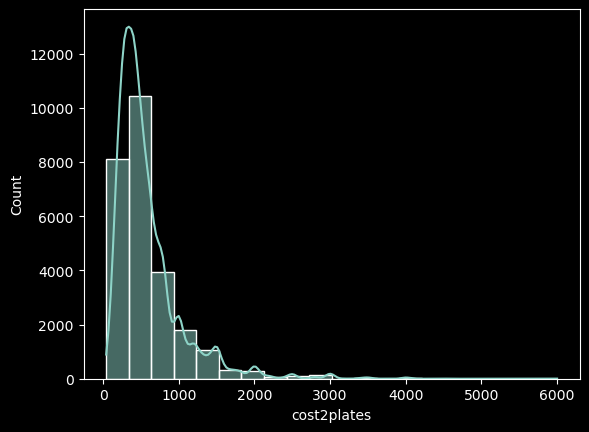

In [81]:
couple_data=df['cost2plates']
sns.histplot(x=couple_data, bins=20, kde=True)


Q 4. WHICH MODE RECEIVE MAXIMUM RATING ?

<Axes: xlabel='online_order', ylabel='rate'>

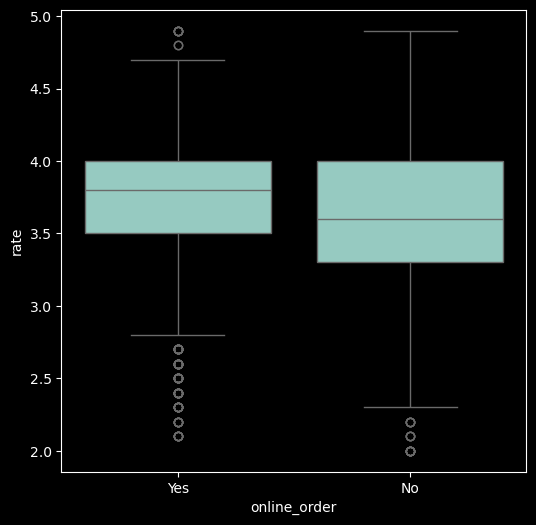

In [84]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

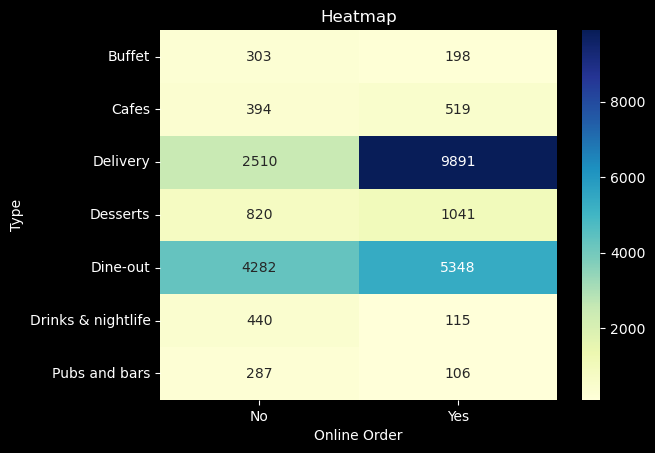

In [88]:
pivot_table = df.pivot_table(index='type', columns='online_order', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type")
plt.show()
